<a href="https://colab.research.google.com/github/FaraazArsath/Project_ensemble_techniques_breast_cancer_detection/blob/main/Ensemble_Learning_Project_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Learning Project - Breast Cancer Type Classification**

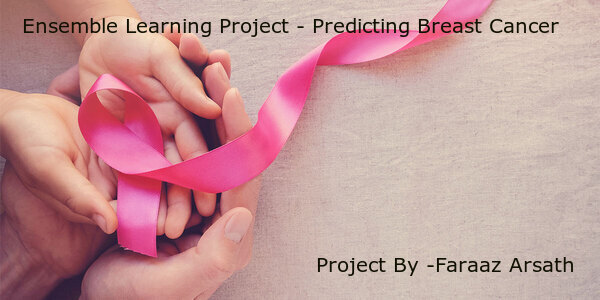

Abstract: 

Breast cancer represents one of the diseases that make a high number of deaths every year. It is the most common type of all cancers and the main cause of women's deaths worldwide. Classification and data mining methods are an effective way to classify data. Especially in the medical field, where those methods are widely used in diagnosis and analysis to make decisions.

Problem Statement:

Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques. Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy

<pre>Table of contents
1. Importing Packages
2. Reading Data
3. Understanding and preparing data
       3.1 Data Dimension
       3.2 Cleaning data
       3.3 Encoding the target variable
       3.4 Statistical Summary
       3.5 Exploratory Data Anaysis
       3.6 Feature Selection 
4. Ensemble Learning Techniques
       4.1 Voting Classifier
       4.2 Bagging Classifier
       4.3 XGBM 
5. Model Comparison
6. Summary</pre>

**1. Importing Packages**

In [1]:
# ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd

# for visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV # for splitting data
from sklearn.preprocessing import StandardScaler # for scaling data

from sklearn.feature_selection import RFE # feature selection with recursive feature elimination
from sklearn.pipeline import Pipeline 
# to display pipeline
from sklearn import set_config
set_config(display='diagram')
# for evaluation 
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,DetCurveDisplay, RocCurveDisplay

# to fit various ensemble models
from sklearn.ensemble import VotingClassifier , RandomForestClassifier , BaggingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**2. Reading Data**

In [2]:
dataset = pd.read_csv("cancer.csv")

In [3]:
# Checking data samples
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



**3. Understanding and Preparing the Data**

**3.1 Data Dimension**

In [4]:
# Printing number of rows and columns in the dataset
dataset.shape

(569, 33)

In [5]:
# Printing description of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# knowing unique values in 'id' column
dataset['id'].nunique()

569

**3.2 Cleaning Data**

We can observe from data description,
* column 'Unnamed: 32' has no information so we can remove this column from dataset

* column 'id' seems to unique id of patient , so this also doesn't add much to label prediction and we can remove this from dataset

In [7]:
dataset = dataset.drop(columns=['id','Unnamed: 32'])

**3.3 Encoding the target variable**

In [8]:
# label encoding target variable 
# Malignant(cancerous) as '1' and Benign(Non cancerous) as '0'

dataset['diagnosis'] = dataset.diagnosis.map({"M":1,"B":0})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**3.4. Statistical Summary**

In [9]:
features_list = dataset.columns[1:].values
label = [dataset.columns[0]]
print("Features List:",features_list)
print()
print("Label:",label)

Features List: ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']

Label: ['diagnosis']


Data Statistics :

* Total Entries : 569
* There are total 31 columns 
* Label Column : Diagnosis
* Features Columns : ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
* All columns are numeric(float64) and label is an object

In [10]:
# undertanding numeric attributes in the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


**3.5 Exploratory Data Anaysis**

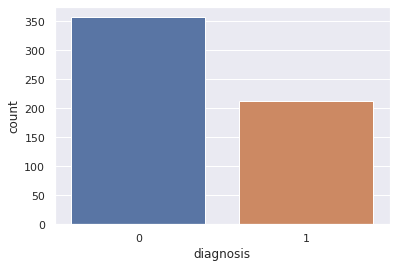

In [11]:
# Visualizing target variable
sns.set(rc={'figure.figsize': (6, 4)}) 
sns.countplot(dataset['diagnosis'])
plt.show()

Observation:

We can infer that the majority of the diagnosis in this dataset belongs to the **class 0** (Benign) - non cancerous

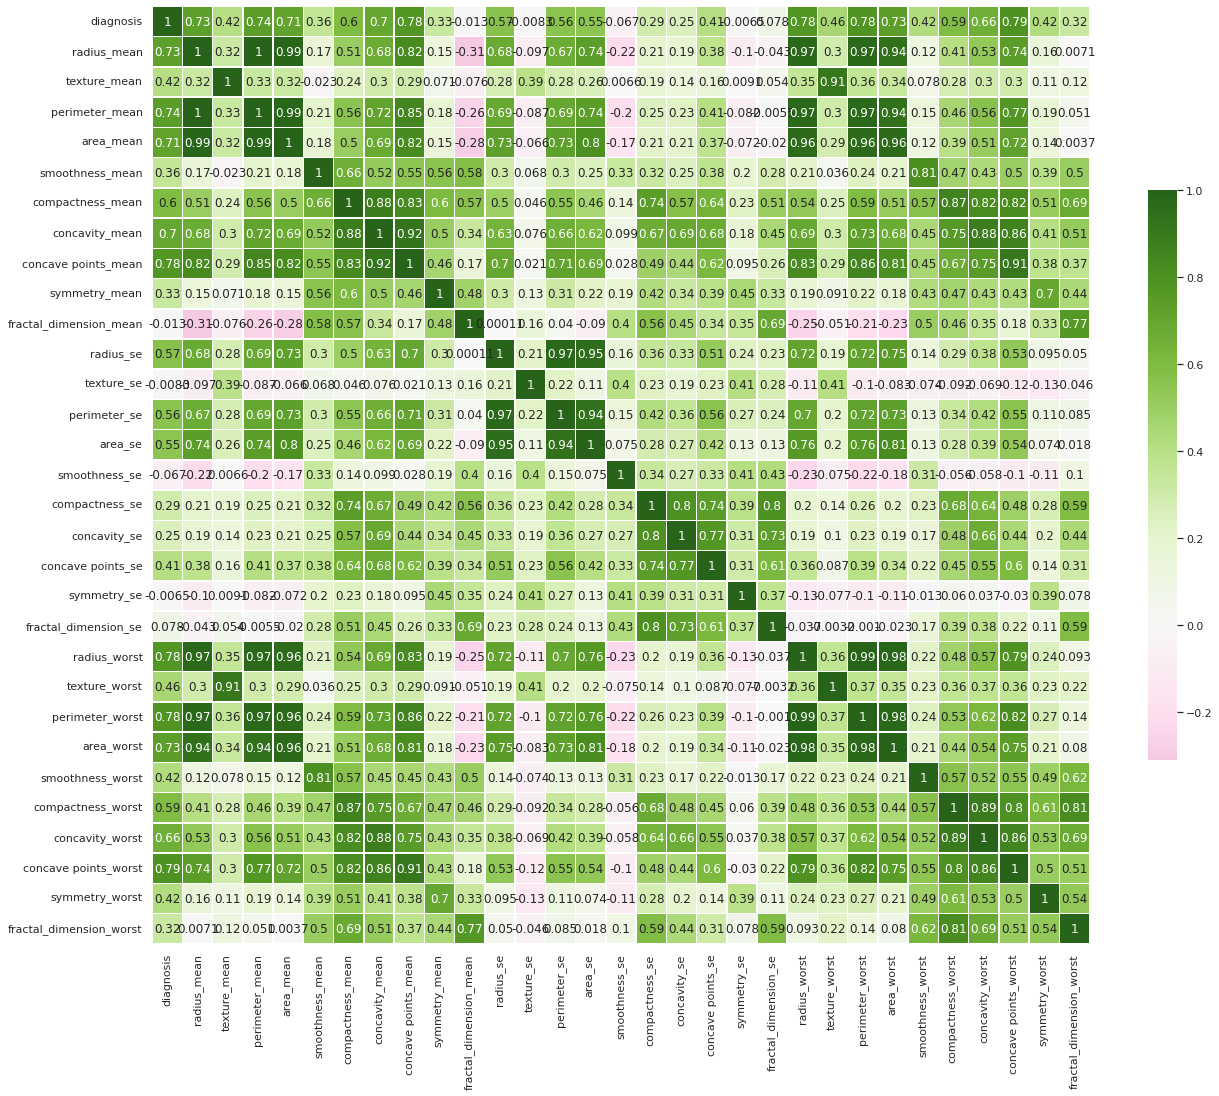

In [12]:
# Finding correlated columns 
correlation = dataset.corr()
f, ax = plt.subplots(figsize=(21, 21))
sns.heatmap(correlation,cmap="PiYG",annot=True, linewidths=.5,center=0,square=True,cbar_kws={"shrink": .5})
plt.show()

Observation:

* We observe various faetures having strong positive and negative correlations with label (Dignosis).
* There is multicollinearity that is some strong positive linear relationships exists between features (independent variables).

**3.6 Feature Selection**

In [13]:
# Splitting data into train and test dataset

X = dataset.drop(columns=['diagnosis'],axis=1)
y = dataset['diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

**Feature selection with RFE (Recursive Feature Elimination)**

Recursive feature elimination (RFE) is a feature selection method and its goal  is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached

In [14]:
# building a baseline model for rfe using Random Forest Classifier
estimator = RandomForestClassifier(random_state=100)
baseline_model = estimator.fit(X_train,y_train)
y_pred = baseline_model.predict(X_test)
accuracy_basemodel = accuracy_score(y_test,y_pred)
f1_basemodel= f1_score(y_test,y_pred)
print("Baseline Model Accuracy score:",accuracy_basemodel)
print("Baseline Model F1 score:",f1_basemodel)

# applying rfe
rfe = RFE(estimator=estimator, step =1)
selector = rfe.fit(X_train,y_train)
# creating new subset of data with only selected features from Recursive feature Elimination
X_train_rfe = rfe.transform(X_train) 
X_test_rfe = rfe.transform(X_test)
# fitting our baseline model with transformed data
rfe_model = estimator.fit(X_train_rfe,y_train)

# Comparison of model performance with and without feature selection
print('_____________________________')
y_pred_rfe = rfe_model.predict(X_test_rfe)
rfe_ac = accuracy_score(y_test,y_pred_rfe)
rfe_f1 = f1_score(y_test,y_pred_rfe)
print("RFE Model Accuracy score:",rfe_ac)
print("RFE Model F1 score:",rfe_f1)

Baseline Model Accuracy score: 0.958041958041958
Baseline Model F1 score: 0.9433962264150944
_____________________________
RFE Model Accuracy score: 0.965034965034965
RFE Model F1 score: 0.9532710280373831


Observation:

We infer model with feature selection is giving improved accuracy and f1 score values. 

Hence, we apply this RFE feature selection to our Ensemble Learning Technique so that we can increases the prediction power of our algorithms by selecting the most critical variables and eliminating the redundant and irrelevant ones.


In [15]:
# Representing the best feature in tabular form
print("No.of features: %d" % selector.n_features_)
print("Selected features: %s" % selector.support_)
print("Feature ranking: %s" % selector.ranking_)

# X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

No.of features: 15
Selected features: [ True  True  True  True False False  True  True False False False False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]
Feature ranking: [ 1  1  1  1  3  4  1  1 12 14  5  9  6  1 15 10 13 11 16  8  1  1  1  1
  1  2  1  1  1  7]


,Feature,Ranking
0,radius_mean,1
22,perimeter_worst,1
23,area_worst,1
24,smoothness_worst,1
28,symmetry_worst,1
13,area_se,1
21,texture_worst,1
27,concave points_worst,1
26,concavity_worst,1
6,concavity_mean,1


**4. Ensemble Learning Techniques**

**4.1 Voting Classifier**

For our  Voting classifier model we will combine Logistic Regression, Decision Trees and K-Nearest Neighbors classifiers and use the average predicted probabilities (soft vote) to predict the class labels.

0.9366002214839424
{'n_neighbors': 14}
KNeighborsClassifier(n_neighbors=14)


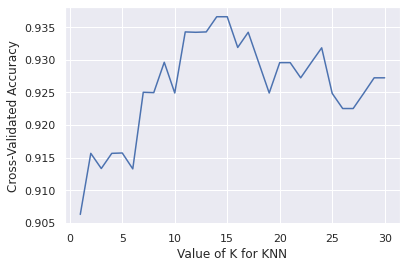

In [16]:
# Tuning the hyper-parameter of KNN Classifier

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9461794019933555
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4, random_state=1)


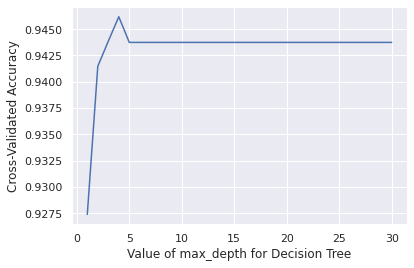

In [17]:
# Tuning tree max_depth parameter of Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=1)
max_depth_range = list(range(1, 31))
param_grid = dict(max_depth=max_depth_range)
grid = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(max_depth_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [18]:
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1,max_depth=4)
model3 = KNeighborsClassifier(n_neighbors=14)
voting_model = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', RFE(estimator = RandomForestClassifier())),
  ('classification', VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft'))
])

# Displaying Voting Classifier model pipeline
voting_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', RFE(estimator=RandomForestClassifier())),
                ('classification',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=1)),
                                              ('dt',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      random_state=1)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=14))],
                                  voting='soft'))])

___________________________Voting Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

# Confusion matrix


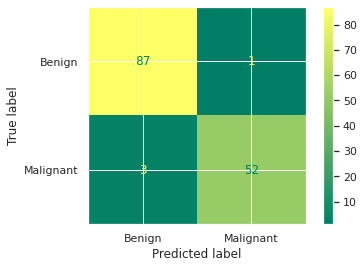

In [19]:
# fitting  and evaluating voting classifier model in training and test dataset

voting_model.fit(X_train,y_train)
print('___________________________Voting Classifier_______________________')
print()
# evaluating model on test dataset 
y_pred = voting_model.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

TP: 52 positive cases correctly predicted

TN: 87 negative cases correctly predicted

FP: 1 negative cases are misclassified (wrong positive predictions)

FN: 3 positive cases are misclassified (wrong negative predictions)

---



**4.2 Bagging Classifier**

Bagging meta-estimator in ensemble algorithms is a bagging methods which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. 

In our problem we took bagging ensemble of Support Vector Classifier as base estimator.

In [20]:
svm = SVC() 
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel':['rbf']}
grid = GridSearchCV(svm,param_grid,verbose=0,cv=10)
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)   
print(grid.best_estimator_)

0.9040420819490587
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)


In [21]:
bagging_model = Pipeline([
  ('scaler', StandardScaler()),
  ('feature_selection', RFE(estimator = RandomForestClassifier())),
  ('classification', BaggingClassifier(base_estimator=SVC(C=1, gamma=0.001,kernel='rbf'),n_estimators=10, random_state=1))
])

# Displaying Bagging Classifier model pipeline
bagging_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', RFE(estimator=RandomForestClassifier())),
                ('classification',
                 BaggingClassifier(base_estimator=SVC(C=1, gamma=0.001),
                                   random_state=1))])

___________________________Bagging Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        88
           1       1.00      0.85      0.92        55

    accuracy                           0.94       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143

# Confusion matrix


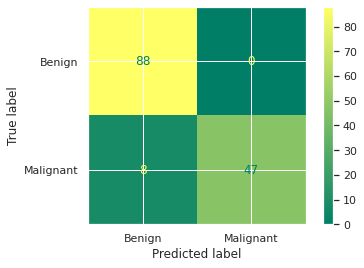

In [22]:
# fitting  and evaluating Bagging classifier model in training and test dataset

bagging_model.fit(X_train,y_train)
print('___________________________Bagging Classifier_______________________')
print()
# evaluating model on test dataset 
y_pred = bagging_model.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

TP: 47 positive cases correctly predicted

TN: 88 negative cases correctly predicted

FP: 0 negative cases are misclassified (wrong positive predictions)

FN: 8 positive cases are misclassified (wrong negative predictions)

---

**4.3 XGBoost (eXtreme Gradient Boosting)**

The XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler and weaker models. 

0.9625138427464008
{'learning_rate': 0.02, 'n_estimators': 100}
XGBClassifier(learning_rate=0.02, random_state=1)


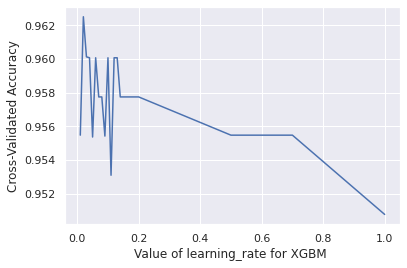

In [23]:
# Tuning learning rate parameter of XG Boost Classifier

xgbm = xgb.XGBClassifier(random_state=1)
lr = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]
n_estimators = [100]
param_grid = dict(learning_rate=lr,n_estimators=n_estimators)
grid = GridSearchCV(xgbm, param_grid, cv=10)
grid.fit(X_train, y_train)
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(lr, grid_mean_scores)
plt.xlabel('Value of learning_rate for XGBM ')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [24]:
xgbm_model = Pipeline([
    ('scaler', StandardScaler()),
  ('feature_selection', RFE(estimator = RandomForestClassifier())),
  ('classification', xgb.XGBClassifier(learning_rate = 0.02, n_estimators=100))
])

# Displaying Bagging Classifier model pipeline
xgbm_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', RFE(estimator=RandomForestClassifier())),
                ('classification', XGBClassifier(learning_rate=0.02))])

___________________________ XGBoost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

# Confusion matrix


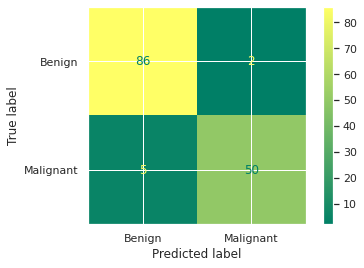

In [25]:
# fitting  and evaluating  XGBoost classifier model in training and test dataset

xgbm_model.fit(X_train,y_train)
print('___________________________ XGBoost Classifier_______________________')
print()
# evaluating model on test dataset 
y_pred = xgbm_model.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

TP: 50 positive cases correctly predicted

TN: 86 negative cases correctly predicted

FP: 2 negative cases are misclassified (wrong positive predictions)

FN: 5 positive cases are misclassified (wrong negative predictions)

---

**5. Model Comparison**

Voting classifier: 0.942884 (0.029145)
Bagging Classifier: 0.903198 (0.061838)
XG Boost: 0.926055 (0.025318)


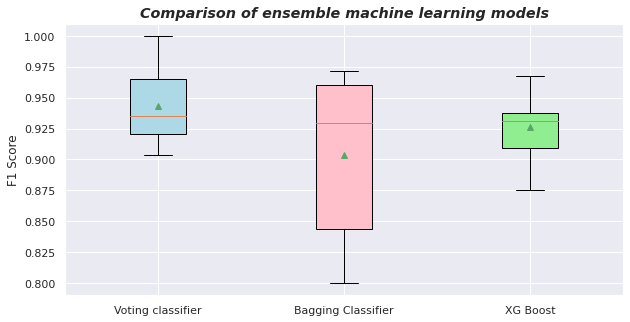

In [31]:
# Visualizing comparison of ensemble models using 'F1-Score'

models = []
models.append(('Voting classifier',voting_model))
models.append(('Bagging Classifier',bagging_model))
models.append(('XG Boost',xgbm_model))
results=[]
names = []
for name, model in models:
  cv = KFold(n_splits=10, random_state=1,shuffle=True)
  cv_results = cross_val_score(model,X_train, y_train, cv=cv, scoring='f1',n_jobs=-1, error_score='raise')
  results.append(cv_results)
  names.append(name)
  scores = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(scores)

# creating boxplot
fig = plt.figure(figsize=(10, 5))
plt.title('Comparison of ensemble machine learning models',fontsize='large',fontweight='bold',
    style='italic')
ax = fig.add_subplot(111)
bp = plt.boxplot(results,showmeans=True,patch_artist=True)

_colors = ['lightblue', 'pink', 'lightgreen'] 
for patch, color in zip(bp['boxes'], _colors): patch.set_facecolor(color) 
# for cap in bp['caps']: cap.set(color ='#8B008B', linewidth = 2) 
# for median in bp['medians']: median.set(color ='red', linewidth = 3)  
ax.set_xticklabels(names)
ax.set_ylabel('F1 Score')
plt.show()

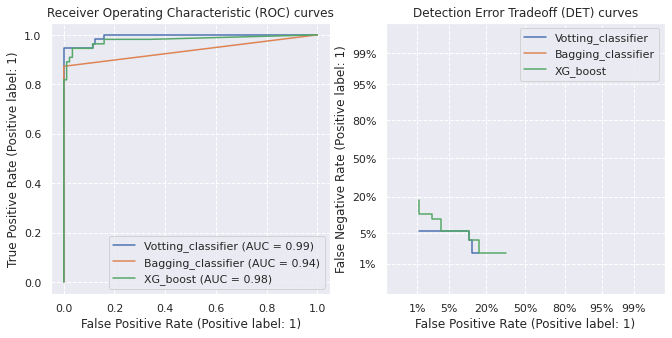

In [30]:
# Plotting ROC and DET Curves

classifiers = {'Votting_classifier':voting_model,'Bagging_classifier':bagging_model,'XG_boost':xgbm_model}
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11,5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

**6. Summary**

In this project we used three different Ensemble models to our Breast Cancer Diagnosis dataset. Our results are reported with 75:25 training test data split and for 10 fold cross validation.

comparing F1 Score:
* our proposed ensemble learning models achieved F1 score accuracies of 94%, 90% and 92% respectively.
* Voting Classifier performs better than XG Boost with an accuracy of 94%

Since our project is medical diagnosis we need to give maximum importance to Type II error in statistics(False Negative).False Negative is that the truth is positive, but the test predicts a negative. The person is sick, but the test inaccurately reports that they are not.To know the performance over False negative rate we will compare our ensemble models with confusion matrix ,ROC and DET curves.

Comparing confusion matrix:
* Voting classifier has less number False Negatives compared to XG Boost and Bagging Classifier

Comparing ROC Curve:
* While comparing ROC Curves we found Voting classifier lies at ideal point that is top left corner and has larger area under the curve (AUC) which is 0.99 compared to XG Boost which has 0.98 and Bagging classifier with 0.94

Comparing DET Curve:
* The DET Curve has distinct advantages over the standard ROC type curve for presenting performance results where tradeoffs of two error types are involved. Here we can observe Voting Classifier has lesser error tradeoff compared to XG Boost.

Experimental results show that Voting Classifier(soft voting) was the most powerful prediction model than other ensemble machine learning techniques for Breast Cancer dataset.